In [1]:
import pandas as pd
import numpy as np
from random import shuffle
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import re
import os
from tqdm.notebook import tqdm
from collections import Counter
import warnings
import nltk
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
perc_missing_locs = 2533 / 7613 * 100
print(f"Percentage of missing location: {perc_missing_locs: .1f}%")

Percentage of missing location:  33.3%


In [9]:
num_target_1 = sum(df.target == 1)
num_target_0 = sum(df.target == 0)
print(f"Number of rows with target = 1: {num_target_1}\nNumber of rows with target = 0: {num_target_0}")

Number of rows with target = 1: 3271
Number of rows with target = 0: 4342


The data is slightly unbalanced.

In [10]:
# Fill the empty cells with "NA". There is nothing special about the choice of this word, just a unique name.

In [11]:
df.fillna('NA', inplace=True)

In [12]:
df.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

### Disaster vs non-disaster tweets

In [13]:
num_disaster = sum(df.target == 1)
num_non_disaster = sum(df.target == 0)

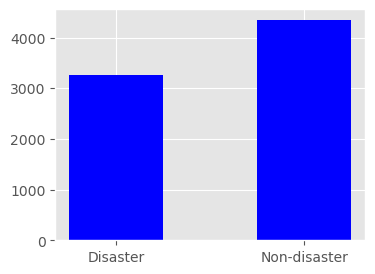

In [14]:
barWidth = 0.5
fig = plt.subplots(figsize =(4, 3)) 
disaster_or_not = ['Disaster', 'Non-disaster']
num_disaster_or_not = [num_disaster, num_non_disaster]
plt.bar(disaster_or_not,num_disaster_or_not,color="blue", width = barWidth)
plt.show()

## Keyword analysis

#### 1. Disaster case

In [15]:
disasters = df[df.target == 1]

In [16]:
disaster_keyword_counts = Counter(disasters.keyword.values)

In [17]:
num_of_disater_keywords = len(set(disaster_keyword_counts))
print(f"Total number of unique keywords: {num_of_disater_keywords}")

Total number of unique keywords: 221


In [18]:
# Top 20 keywords

In [19]:
top20_disaster_keywords = sorted(disaster_keyword_counts.items(), key=lambda v: v[1], reverse=True)[:20]

In [20]:
col_names = ["keyword", "key_count"]
df_top20_disaster_keywords = pd.DataFrame(top20_disaster_keywords, columns=col_names)

In [21]:
# keyword vs count bar chart (excluding 'NA')

In [22]:
keywords = df_top20_disaster_keywords.keyword.values[1:]

In [23]:
keywords_counts = df_top20_disaster_keywords.key_count.values[1:]

In [24]:
def plot_barh(x, y, title):
    plt.barh(x,y,color="blue")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

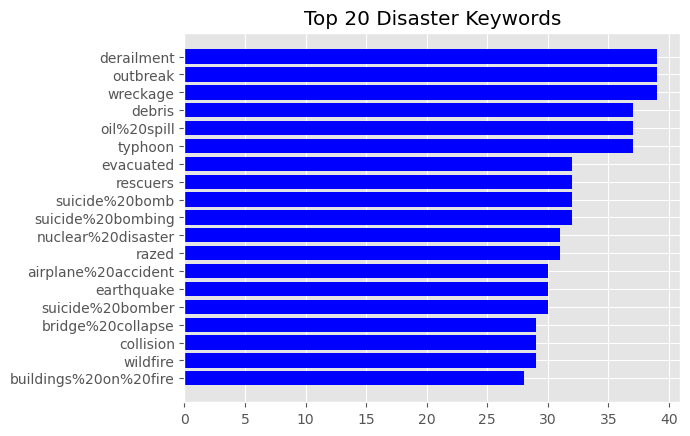

In [25]:
plot_barh(keywords, keywords_counts, 'Top 20 Disaster Keywords')

#### 2. Non-disaster case

In [26]:
nondisasters = df[df.target == 0]

In [27]:
nondisaster_keyword_counts = Counter(nondisasters.keyword.values)

In [28]:
num_of_nondisater_keywords = len(set(nondisaster_keyword_counts))

In [29]:
# Top 20 keywords

In [30]:
top20_nondisaster_keywords = sorted(nondisaster_keyword_counts.items(), key=lambda v: v[1], reverse=True)[:20]

In [31]:
col_names = ["keyword", "key_count"]
df_top20_nondisaster_keywords = pd.DataFrame(top20_nondisaster_keywords, columns=col_names)

In [32]:
keywords = df_top20_nondisaster_keywords.keyword.values

In [33]:
keywords_counts = df_top20_nondisaster_keywords.key_count.values

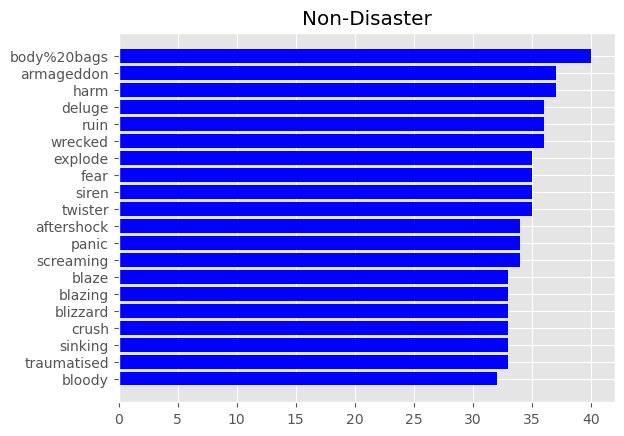

In [34]:
plot_barh(keywords, keywords_counts, 'Non-Disaster')

##### From observing the top 20 keywords for both cases, there is a clear separation between two. Therefore most likely the keywords will play good roles in prediction. 

## Location analysis

#### 1. Disaster case

In [35]:
disasters.location.unique()

array(['NA', 'Birmingham', 'AFRICA', ..., "Xi'an, China",
       'Santa Cruz, CA', 'Manhattan, NY'], dtype=object)

In [36]:
disaster_location_counts = Counter(disasters.location.values)

In [37]:
num_of_disater_locations = len(set(disaster_location_counts))

In [38]:
# Top 20 locations

In [39]:
top20_disaster_locations = sorted(disaster_location_counts.items(), key=lambda v: v[1], reverse=True)[:20]

In [40]:
col_names = ["location", "loc_count"]
df_top20_disaster_locations = pd.DataFrame(top20_disaster_locations, columns=col_names)

In [41]:
# location vs count bar chart (excluding 'NA')

In [42]:
locations = df_top20_disaster_locations.location.values[1:]

In [43]:
location_counts = df_top20_disaster_locations.loc_count.values[1:]

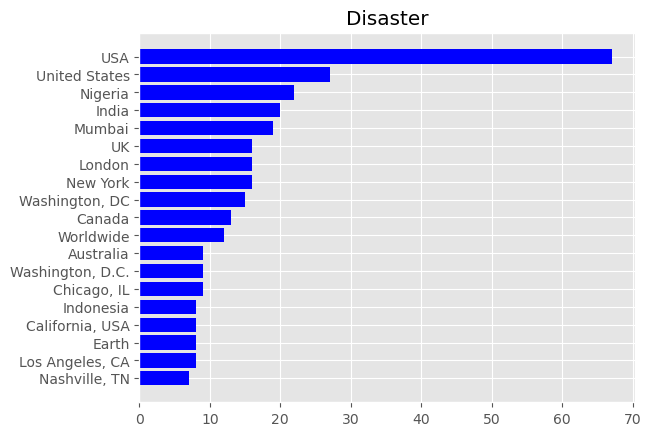

In [44]:
plot_barh(locations, location_counts, 'Disaster')

#### 2. Non-disaster case

In [45]:
nondisasters.location.unique()

array(['NA', 'Est. September 2012 - Bristol', 'Philadelphia, PA', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [46]:
nondisaster_location_counts = Counter(nondisasters.location.values)

In [47]:
num_of_nondisater_locations = len(set(nondisaster_location_counts))

In [48]:
# Top 20 locations

In [49]:
top20_nondisaster_locations = sorted(nondisaster_location_counts.items(), key=lambda v: v[1], reverse=True)[:20]

In [50]:
col_names = ["location", "loc_count"]
df_top20_nondisaster_locations = pd.DataFrame(top20_nondisaster_locations, columns=col_names)

In [51]:
# location vs count bar chart (excluding 'NA')

In [52]:
locations = df_top20_nondisaster_locations.location.values[1:]

In [53]:
location_counts = df_top20_nondisaster_locations.loc_count.values[1:]

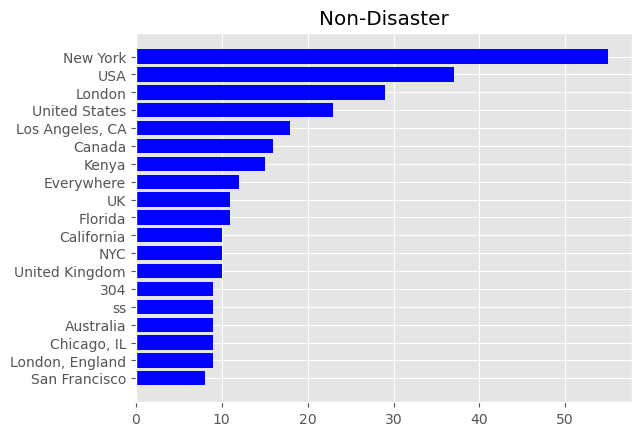

In [54]:
plot_barh(locations, location_counts, 'Non-Disaster')

##### From observing the top 20 keywords for both cases, it does not seem that locatons will help much in classification.

## Text analysis

In [55]:
def tokenize_tweet(tweet):
    #tokenized_tweet = []
    tweet = tweet.lower()
    tokenized = nltk.word_tokenize(tweet)
    #tokenized_tweet.append(tokenized)    
    return tokenized

#### 1. Disaster case

In [56]:
disaster_tweets = df[df.target == 1].text

#### Tokenize the tweets, punctuations replaced by . and lower case and drop non-alpha

In [57]:
def tokenize_tweets(tweets):
    tokenized_tweets = []
    for tweet in tweets.values:
        tweet = re.sub(r'[,!?;-]', '.', tweet) #  Punctuations are replaced by .
        tokenized_tweet = tokenize_tweet(tweet)  
        tokenized_tweet = [ ch.lower() for ch in tokenized_tweet if ch.isalpha() or ch == '.']  #  Lower case and drop non-alphabetical tokens
        tokenized_tweets.append(tokenized_tweet)
    return tokenized_tweets

In [58]:
tokenized_disaster_tweets = tokenize_tweets(disaster_tweets)

In [59]:
# Remove stop words

In [60]:
def stopwords_tweets(tokenized_tweets):
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords_tweets = []
    for tokenized_tweet in tokenized_tweets:
        tokens_wo_stopwords = [t for t in tokenized_tweet if t not in english_stopwords] 
        tokens_wo_stopwords_tweets.append(tokens_wo_stopwords) 
    return tokens_wo_stopwords_tweets

In [61]:
tokens_wo_stopwords_disaster_tweets = stopwords_tweets(tokenized_disaster_tweets)

In [62]:
tokens_wo_stopwords_disaster_tweets[:2]

[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', '.', 'canada']]

In [63]:
def count_tokens(list2d):
    token_count = {}
    for row in list2d:
        for token in row:
            if token in token_count:
                token_count[token] += 1
            else:
                token_count[token] = 1
    return token_count

In [64]:
disaster_token_count = count_tokens(tokens_wo_stopwords_disaster_tweets)

In [65]:
top20_disaster_tokens = sorted(disaster_token_count.items(), key=lambda v: v[1], reverse=True)[:20]

In [66]:
col_names = ["token", "token_count"]
df_top20_disaster_tokens = pd.DataFrame(top20_disaster_tokens, columns=col_names)

In [67]:
# token vs count bar chart (excluding "http" and ".")

In [68]:
tokens = df_top20_disaster_tokens.token.values[2:]

In [69]:
token_counts = df_top20_disaster_tokens.token_count.values[2:]

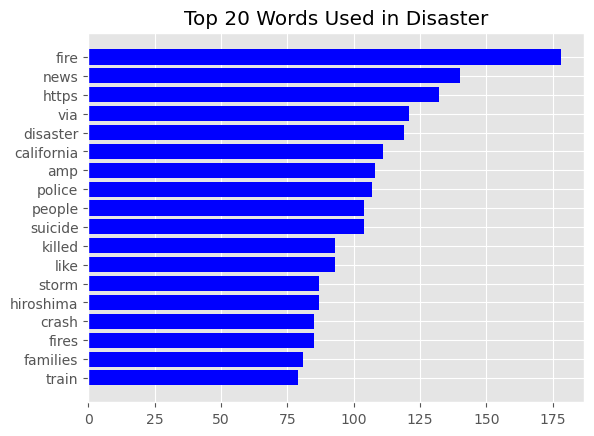

In [70]:
plot_barh(tokens, token_counts, 'Top 20 Words Used in Disaster')

#### 2. Non-Disaster case

In [71]:
nondisaster_tweets = df[df.target == 0].text

#### Tokenize the tweets, punctuations replaced by . and lower case and drop non-alpha

In [72]:
tokenized_nondisaster_tweets = tokenize_tweets(nondisaster_tweets)

In [73]:
# Remove stop words

In [74]:
tokens_wo_stopwords_nondisaster_tweets = stopwords_tweets(tokenized_nondisaster_tweets)

In [75]:
tokens_wo_stopwords_nondisaster_tweets[:2]

[['man', '.'], ['love', 'fruits']]

In [76]:
nondisaster_token_count = count_tokens(tokens_wo_stopwords_nondisaster_tweets)

In [77]:
top20_nondisaster_tokens = sorted(nondisaster_token_count.items(), key=lambda v: v[1], reverse=True)[:20]

In [78]:
col_names = ["token", "token_count"]
df_top20_nondisaster_tokens = pd.DataFrame(top20_nondisaster_tokens, columns=col_names)

In [79]:
# token vs count bar chart (excluding "http", "https", and ".")

In [80]:
tokens = df_top20_nondisaster_tokens.token.values[3:]

In [81]:
token_counts = df_top20_nondisaster_tokens.token_count.values[3:]

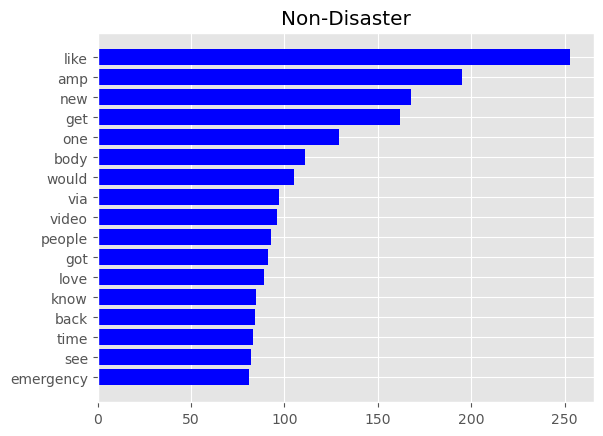

In [82]:
plot_barh(tokens, token_counts, 'Non-Disaster')

From looking at the two plots, I can see separation in popular words used in both cases.